<a href="https://colab.research.google.com/github/lillianpoland/hi-class/blob/main/Lill_PolaU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 3 Project: What is the Total Amount of SAT points earned by UT Chemical Engineering students?

This project will determine the total amount of SAT points earned by UT Chemical Engineering Students.

The SAT test is taken during junior and senior year of high school and tests students on math and reading, developing a score based on their performance in both sections. My mom works at UT in the Chemical Engineering department and let me ask 30 of the grad students she works with their SAT scores from the best of their memory. Analyzing these scores showed me interesting info regarding the distribution of certain scores. This topic is very interesting to me as I am a junior and many people are talking about SATs and college. I have always wondered how certain students performed and the distribution behind the data of a group of scores.



In [ ]:
#code necessary to run the models
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.

In [ ]:
import preliz as pz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

In [ ]:
#URL link that connects to my raw data within Github
url_SAT = 'https://raw.githubusercontent.com/lillianpoland/hi-class/refs/heads/main/another%20SAT%20Chemical%20engineers%20UT%20data%20-%20Sheet1%20(1).csv'
data_SAT = pd.read_csv(url_SAT)

In [ ]:
#visually shows the data from URL above
data_SAT


,data
0,700
1,1600
2,850
3,900
4,950
5,1000
6,1350
7,1400
8,1450
9,1450


(array([1., 1., 2., 4., 6., 4., 5., 4., 2., 1.]),
 array([ 700.,  790.,  880.,  970., 1060., 1150., 1240., 1330., 1420.,
        1510., 1600.]),
 <BarContainer object of 10 artists>)

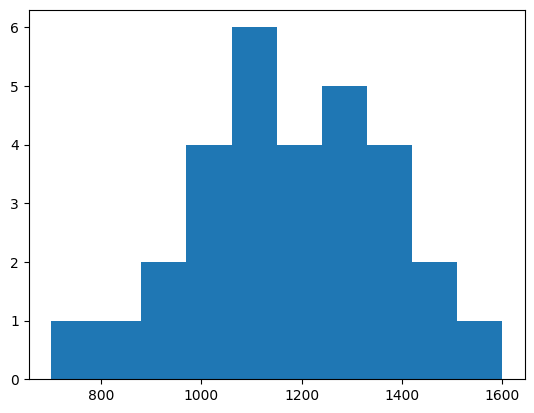

In [ ]:
# Now I visualize the raw data as a histogram with 10 bins (the default)
plt.hist(data_SAT)

This data is not skewed left or right - normally distributed

In [ ]:
#N for normal
with pm.Model() as model_SAT:
    # I have no idea where the mean should be, but its reasonalbe to assume
    # its between our lowest and highest values recorded
    μ = pm.Uniform('μ', lower=650, upper=1600)

    #this one is new, but its exactly what it sounds like: half of a normal dist
    σ = pm.HalfNormal('σ', sigma=5)

    #our fancy new likelihood, with two priors
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=data_SAT)
    idata_SAT = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

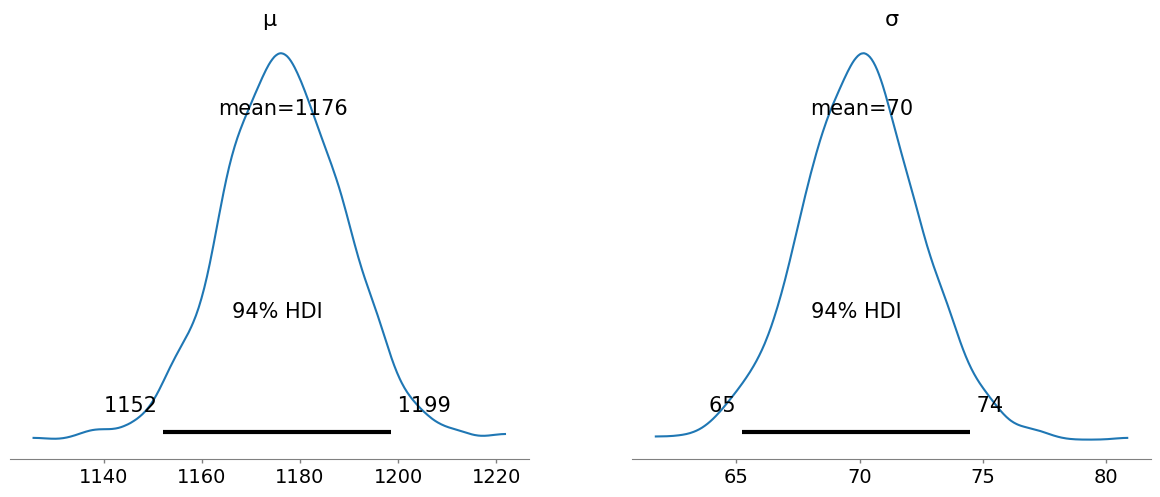

In [ ]:
az.plot_posterior(idata_SAT)

The mean score is 1176, which is pretty much in the middle of the scores recorded.

In [ ]:
pm.sample_posterior_predictive(idata_SAT, model=model_SAT, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

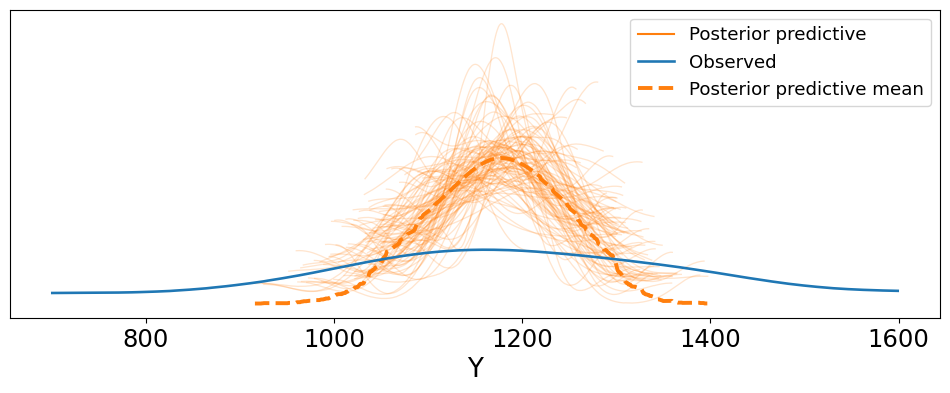

In [ ]:
#The following code block is taken directly from the textbook BAP3.
#Plots the posterior predictive density overlaid with a smoothed version of the data

az.plot_ppc(idata_SAT, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Student T distribution model

In [ ]:
#T is for Student's T distribution
with pm.Model() as model_SAT:
    # weak prior
    μ = pm.Uniform('μ', lower=650, upper=1600)

    #the same as before
    σ = pm.HalfNormal('σ', sigma=5)

    #this is our normality parameter; lam = 1/1176 gives a mean of 1176
    ν = pm.Exponential('ν', lam = 1/1176)

    #new likelihood, same data
    y = pm.StudentT('y', mu=μ, sigma=σ, nu = ν, observed=data_SAT)
    idata_SAT = pm.sample()

Output()

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [ ]:
pm.sample_posterior_predictive(idata_SAT, model=model_SAT, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(650.0, 1600.0)

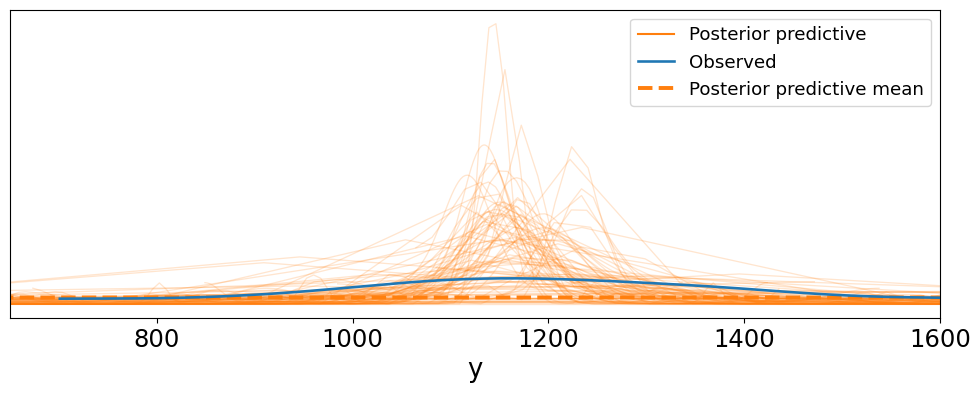

In [ ]:
#The following code block is taken from the textbook BAP3.
#Plots the posterior predictive density overlaid with a smoothed version of the data

ax = az.plot_ppc(idata_SAT, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#need to limit the x axis, so its more readable
ax.set_xlim(650, 1600)

Skew Normal model

In [ ]:
#SN is for skew normal
with pm.Model() as model_SATSN:
    #same weak prior
    μ = pm.Uniform('μ', lower=700, upper=1600)

    #same as before
    σ = pm.HalfNormal('σ', sigma=5)

    #This gives our model the ability to skew towards either the positive numbers
    #or towards the negative numbers
    α = pm.Exponential('α', lam = 1/2)

    #SkewNormal, which is the same as a normal, except with more unusually high
    #or unusually low values.
    y = pm.SkewNormal('y', mu=μ, sigma=σ, alpha = α, observed=data_SAT)
    idata_SATSN = pm.sample()

Output()

Output()

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


In [ ]:
pm.sample_posterior_predictive(idata_SATSN, model=model_SATSN, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='y'>

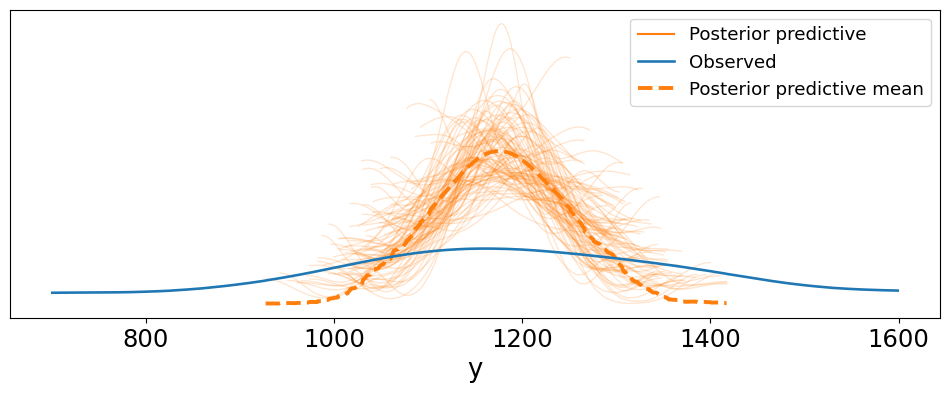

In [ ]:
az.plot_ppc(idata_SATSN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Skew T model

In [ ]:
#ST is for skew T
with pm.Model() as model_SATST:
    #same weak prior
    μ = pm.Uniform('μ', lower=650, upper=1600)

    #same as before
    σ = pm.HalfNormal('σ', sigma=5)

    #when a is larger than b, the dist. is positively skewed
    a = pm.HalfNormal('a', sigma=7)
    b = pm.HalfNormal('b', sigma=1)

    #SkewStudentR, which is the same as a T, except with more unusually high
    #or unusually low values.
    y = pm.SkewStudentT('y',mu=μ, sigma=σ, a = a, b = b, observed=data_SAT)
    idata_SATST = pm.sample()

Output()

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [ ]:
pm.sample_posterior_predictive(idata_SATST, model=model_SATST, extend_inferencedata=True)

Output()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5417: RuntimeWarning: divide by zero 
encountered in divide
  return d2 / d3

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(650.0, 1600.0)

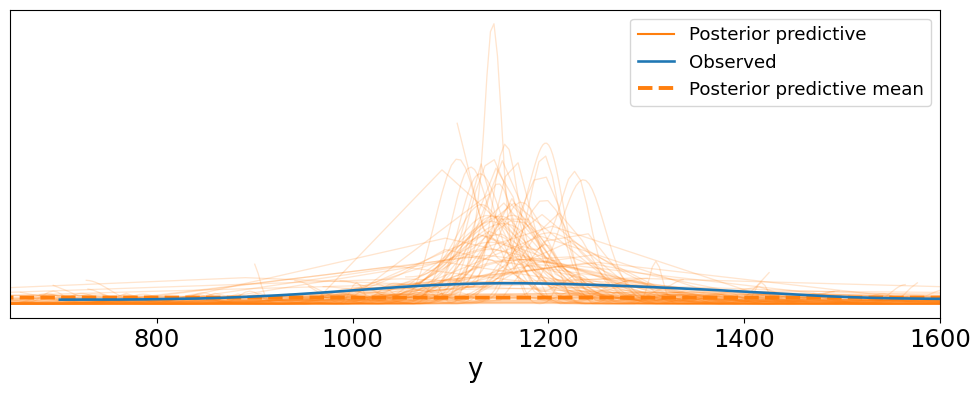

In [ ]:
ax = az.plot_ppc(idata_SATST, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#need to limit the x axis, so its more readable
ax.set_xlim(650, 1600)

Gamma Model

In [ ]:
with pm.Model() as model_SATG:
  # prior
  μ = pm. Uniform('μ', lower=650, upper=1600)

  # Parameters for the Gamma distribution
  alpha = pm.Exponential ('alpha' , lam=1/100) # Shape parameter, must be positive
  beta = pm. Exponential( 'beta', lam=200) # Rate parameter, must also be positive

  # Gamma distribution likelihood
  Y = pm. Gamma('Y', alpha=alpha, beta=beta, observed=data_SAT)

  # Sample from the posterior
  idata_SATG = pm. sample()

Output()

Output()

In [ ]:
pm.sample_posterior_predictive(idata_SATG, model=model_SATG, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(650.0, 1600.0)

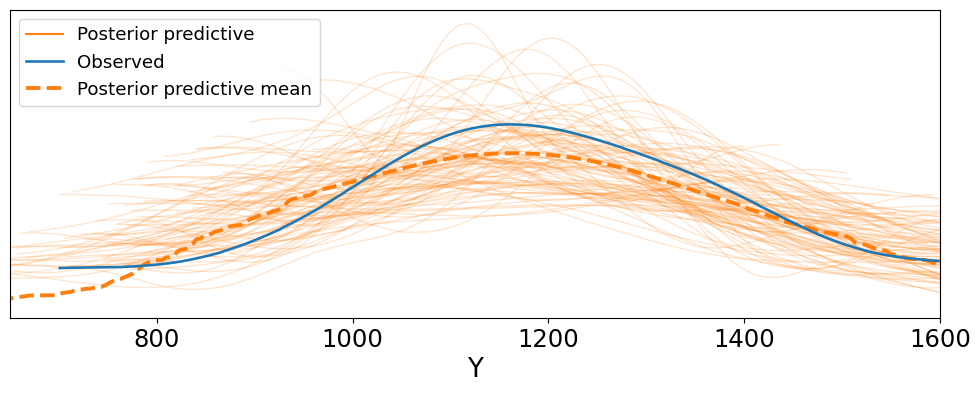

In [ ]:
ax = az.plot_ppc(idata_SATG, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#need to limit the x axis, so its more readable
ax.set_xlim(650, 1600)

Conclusion

While it took many tries for the observed line to be remotely close to aligning with the posterior predictive mean, it still gives us information about our data which is very normally distributed. This shows the mean was almost exactly in the middle of the highest and lowest values of data. This data taught me a lot more about distribution, as my previous data set that made sense until the final day of work, was completely upside down on the table, making it much more difficult to understand this topic. After deciding to switch my data, I found out that I should lean away from data that is constantly increasing and look more towards data that would be more specific and contain similar points.